In [1]:
%clear
import numpy as np
import tensorflow as tf
import datetime
# this code is used to check whether my gradient calculation can be used
import os
import sys
BASE_DIR = os.getcwd()
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
import copy
import cv2
import random

from scipy.ndimage import gaussian_filter
from scipy import misc

print('current working dirctory = ',BASE_DIR)
LOG_DIR = BASE_DIR + '/log'
# 设定了一个log 的路径，方便如何存入和读取模型
if not os.path.exists(LOG_DIR): os.mkdir(LOG_DIR)
print('current log dirctory = ',LOG_DIR)

current working dirctory =  /home/chaotang/文档/Try/2D
current log dirctory =  /home/chaotang/文档/Try/2D/log


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = np.round(x_train/255)
#x_test = np.round(x_test/255)
x_train = np.round(x_train)/255
x_test = np.round(x_test)/255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = np.reshape(x_train,[60000,28,28,1])
x_test = np.reshape(x_test,[10000,28,28,1])

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [3]:
# 传统的定义方法
def digitNet(x,label):
    conv1 = Conv2D(32,(5,5),activation = 'relu',name = 'conv1')(x)
    print('conv1',conv1.shape) #(20, 26, 26, 32)
    MP1 = MaxPooling2D(pool_size=(2, 2),name = 'MP1')(conv1)
    print('MP1',MP1.shape) # (20, 13, 13, 32)
    conv2 = Conv2D(32,(3,3),activation = 'relu',name = 'conv2')(MP1)
    print('conv2',conv2.shape) # (20, 11, 11, 32)
    MP2 = MaxPooling2D(pool_size=(2, 2),name = 'MP2')(conv2)
    print('MP2',MP2.shape) # (20, 5, 5, 32)
    # Dp1 =Dropout(rate = 0.2,name = 'Dp1')(MP1)
    # go down one more. Add one more conv and one more mp
    # leave the dp1
    Flat = Flatten()(MP2)
    print('Flat',Flat.shape) # (20, 800)
    fc1 = Dense(128,activation = 'relu',name = 'fc1')(Flat)
    #out = Dense(10,activation = 'softmax',name = 'out')(fc1)
    print('fc1',fc1.shape) # (20, 128)
    #Dp1 =Dropout(rate = 0.3,name = 'Dp1')(fc1)
    out = Dense(10,name = 'out')(fc1)
    
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out, labels=label)
    return loss, out

# Add Gaussian Noise

test_label 9
test_img (20, 28, 28, 1)
Noise_img (20, 28, 28, 1)


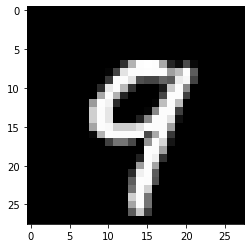

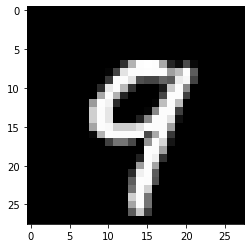

In [5]:
#print('networkoutput = ',networkoutput)
test_index = 12

test_img = np.zeros((20,28,28,1))

test_img[0] = x_test[test_index].reshape(1,28,28,1)
test_label = y_test[test_index].astype('int32')
print('test_label',test_label)
# add Noise

Noise_img = np.zeros((test_img.shape))
Noise_img = test_img + 0.0 * np.random.normal(size = (1,28,28,1))
Noise_img = np.clip(Noise_img,0,1)

print('test_img',test_img.shape)
print('Noise_img',Noise_img.shape)
plt.figure()
plt.imshow(test_img[0].reshape((28,28)),cmap = 'gray')
plt.figure()
plt.imshow(Noise_img[0].reshape((28,28)),cmap = 'gray')

# Add mixed noise

test_label 9
test_img (20, 28, 28, 1)
Noise_img (20, 28, 28, 1)


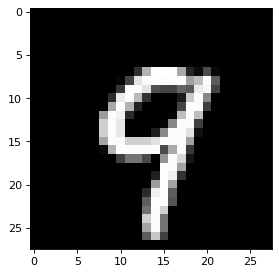

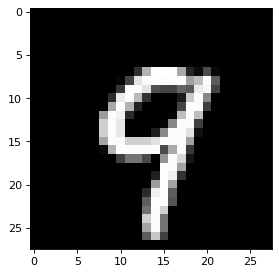

In [91]:
test_index = 12

test_img = np.zeros((20,28,28,1))

test_img[0] = x_test[test_index].reshape(1,28,28,1)
test_label = y_test[test_index].astype('int32')
print('test_label',test_label)
# add Noise

Noise_img = np.zeros((test_img.shape))
Noise_img = test_img + 0.0 * np.random.normal(size = (1,28,28,1))
Noise_img = np.clip(Noise_img,0,1)

print('test_img',test_img.shape)
print('Noise_img',Noise_img.shape)
plt.figure()
plt.imshow(test_img[0].reshape((28,28)),cmap = 'gray')
plt.figure()
plt.imshow(Noise_img[0].reshape((28,28)),cmap = 'gray')

# Add salt_and_peper noise

test_label 9
test_img (20, 28, 28, 1)
Noise_img (20, 28, 28, 1)


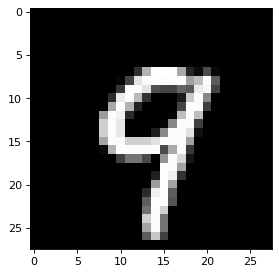

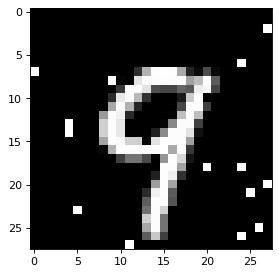

In [10]:
#print('networkoutput = ',networkoutput)
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 1
            else:
                output[i][j] = image[i][j]
    return output

test_index = 12

test_img = np.zeros((20,28,28,1))

test_img[0] = x_test[test_index].reshape(1,28,28,1)
test_label = y_test[test_index].astype('int32')
print('test_label',test_label)
# add Noise

Noise_img = np.zeros((test_img.shape))
salt_peper_img = sp_noise(test_img[0],0.025)# noise level control
Noise_img[0] = salt_peper_img
Noise_img = np.clip(Noise_img,0,1)

print('test_img',test_img.shape)
print('Noise_img',Noise_img.shape)
plt.figure()
plt.imshow(test_img[0].reshape((28,28)),cmap = 'gray')
plt.figure()
plt.imshow(Noise_img[0].reshape((28,28)),cmap = 'gray')

# Gaussian Filter

In [12]:
ascent=Noise_img[0].reshape((28,28))
Processed = gaussian_filter(ascent,sigma=1)

Network_input = Processed.reshape((1,28,28,1))

In [13]:
tf.reset_default_graph()
MODEL_PATH = os.path.join(LOG_DIR,'MydigitNet.ckpt')
# Have to redifine Graph
x_pl = tf.placeholder(tf.float32,shape = [None,28,28,1],name = 'x_pl')
label_pl = tf.placeholder(tf.int32,shape = [None],name = 'label_pl')

loss,output = digitNet(x_pl,label_pl)

saver = tf.train.Saver()
with tf.Session() as sess: 
    saver.restore(sess, MODEL_PATH)
    print("Model restored.")
    # 设置输出小数点位数
    np.set_printoptions(precision=10)
    
    feed1 = {x_pl:test_img}
    output1 = sess.run(output,feed_dict =feed1)
    
    #Noise_img[:,16,9,:] +=1
    
    feed2 = {x_pl:Noise_img}
    output2 = sess.run(output,feed_dict =feed2)
    
    feed3 = {x_pl:Network_input}
    output3 = sess.run(output,feed_dict =feed3)
print('done with Network output')

conv1 (?, 24, 24, 32)
MP1 (?, 12, 12, 32)
conv2 (?, 10, 10, 32)
MP2 (?, 5, 5, 32)
Flat (?, 800)
fc1 (?, 128)
INFO:tensorflow:Restoring parameters from /home/chaotang/文档/Try/2D/log/MydigitNet.ckpt
Model restored.
done with Network output


Original score for testLabel=  23.673397
Original output =  [-12.09794 -17.6905  -19.6961  -15.38374  12.15418  -8.5428  -23.13609
  -2.6946   -5.00959  23.6734 ]
Noise score for testLabel=  19.191422
Noise output =  [-11.45459 -11.84194 -16.06164 -14.66453  12.15537  -7.0384  -20.95554
   0.2428   -7.32958  19.19142]
New score for testLabel=  9.059533
New output=  [-5.01731 -5.98973 -8.77796 -8.52306  7.41101 -5.02911 -9.92919  0.97996
 -2.63647  9.05953]
different =  0.026608033321588846


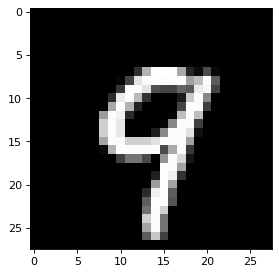

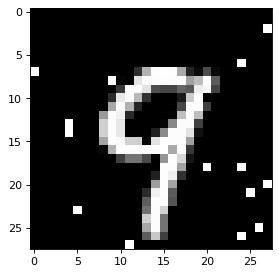

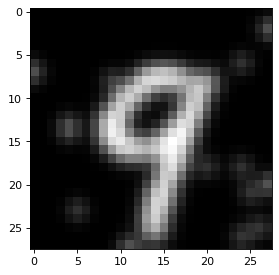

In [14]:
np.set_printoptions(precision=5)
plt.rcParams['figure.dpi'] = 80 #分辨率
plt.imshow(test_img[0].reshape((28,28)),cmap = 'gray')
print('Original score for testLabel= ',output1[0,test_label]) #test_label
print('Original output = ',output1[0,:]) #test_label

plt.figure()
Old_noise = np.clip(Noise_img[0],0,1).reshape((28,28))
plt.imshow(Old_noise,cmap = 'gray')
print('Noise score for testLabel= ',output2[0,test_label])
print('Noise output = ',output2[0,:]) #test_label

plt.figure()
plt.imshow(Processed,cmap = 'gray')
print('New score for testLabel= ',output3[0,test_label])
print('New output= ',output3[0,:])
print('different = ',  np.square(Processed-Old_noise).mean())

In [15]:
from tensorflow.image import psnr
Processed = Processed.reshape((28,28,1))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    psnr_1 = psnr(test_img[0],Processed,max_val = 1.0)
    psnr_2 = psnr(test_img[0],Noise_img[0],max_val = 1.0)
    output_1,output_2 = sess.run([psnr_1,psnr_2])
    print('noisy psnr = ',output_2)
    print('Gaussain psnr = ',output_1)
    

noisy psnr =  17.037428
Gaussain psnr =  17.97454


# Bilateral Filter

In [109]:
ascent=Noise_img[0].reshape((28,28))
ascent = ascent.astype('float32')
Processed_bi = cv2.bilateralFilter(ascent,3,1,1)

Network_input = Processed_bi.reshape((1,28,28,1))

In [110]:
tf.reset_default_graph()
MODEL_PATH = os.path.join(LOG_DIR,'MydigitNet.ckpt')
# Have to redifine Graph
x_pl = tf.placeholder(tf.float32,shape = [None,28,28,1],name = 'x_pl')
label_pl = tf.placeholder(tf.int32,shape = [None],name = 'label_pl')

loss,output = digitNet(x_pl,label_pl)

saver = tf.train.Saver()
with tf.Session() as sess: 
    saver.restore(sess, MODEL_PATH)
    print("Model restored.")
    # 设置输出小数点位数
    np.set_printoptions(precision=10)
    
    feed1 = {x_pl:test_img}
    output1 = sess.run(output,feed_dict =feed1)
    
    #Noise_img[:,16,9,:] +=1
    
    feed2 = {x_pl:Noise_img}
    output2 = sess.run(output,feed_dict =feed2)
    
    feed3 = {x_pl:Network_input}
    output3 = sess.run(output,feed_dict =feed3)
print('done with Network output')

conv1 (?, 24, 24, 32)
MP1 (?, 12, 12, 32)
conv2 (?, 10, 10, 32)
MP2 (?, 5, 5, 32)
Flat (?, 800)
fc1 (?, 128)
INFO:tensorflow:Restoring parameters from /home/chaotang/文档/Try/2D/log/MydigitNet.ckpt
Model restored.
done with Network output


New score for testLabel=  5.028982
New output=  [ -7.14279  -4.52473  -3.90833  -9.98154  10.40491  -4.6953  -11.61902
  -2.19827  -4.53088   5.02898]
different =  0.18629967006462947


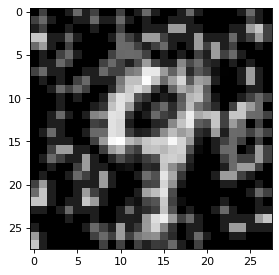

In [111]:
np.set_printoptions(precision=5)
plt.rcParams['figure.dpi'] = 80 #分辨率

plt.figure()
plt.imshow(Processed_bi,cmap = 'gray')
print('New score for testLabel= ',output3[0,test_label])
print('New output= ',output3[0,:])
print('different = ',  np.square(Processed-Old_noise).mean())

In [112]:
from tensorflow.image import psnr
Processed = Processed_bi.reshape((28,28,1))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    psnr_1 = psnr(test_img[0],Processed,max_val = 1.0)
    psnr_2 = psnr(test_img[0],Noise_img[0],max_val = 1.0)
    output_1,output_2 = sess.run([psnr_1,psnr_2])
    print('noisy psnr = ',output_2)
    print('Bilateral psnr = ',output_1)
    

noisy psnr =  8.05044
Bilateral psnr =  11.957226


# Denoising Encoder